## CBOW 모델 구현

In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])  # (6,2,7) => (6,7)(7,3) => (6,3)
        h1 = self.in_layer1.forward(contexts[:, 1])  # (6,2,7) => (6,7)(7,3) => (6,3)
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)            # (6,3)(3,7) => (6,7)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 526 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 527 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 528 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 529 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 530 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 531 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 532 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 533 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 534 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 535 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 536 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 537 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 538 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 539 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 540 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 541 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 542 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 543 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 544 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 545 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 546 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 547 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 548 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 549 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 550 |  반복 1

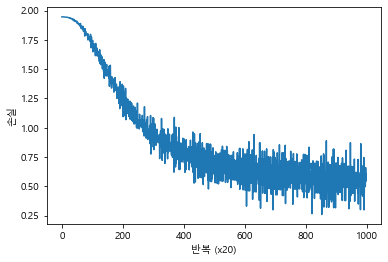

you [-1.1464788  -1.0329548   1.3067971  -0.96382934 -1.2928257 ]
say [ 1.263963    1.2324139  -0.17108895  1.2326286  -0.1950003 ]
goodbye [-0.79958016 -0.9337966   0.4837653  -1.0049939  -0.59914947]
and [ 1.1545478  1.1018758 -1.5689764  1.1102035  1.7093755]
i [-0.8286407  -0.91807836  0.47237387 -1.0364017  -0.5999303 ]
hello [-1.1382884  -1.0342028   1.2865256  -0.96429056 -1.3061316 ]
. [ 0.8572991  1.0237002  1.3792095  1.0358256 -1.4198956]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])